# 2a)

10000
50


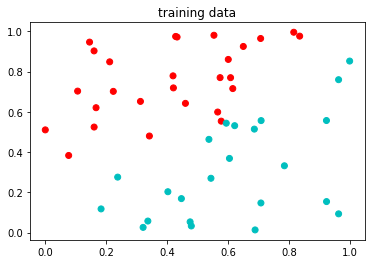

In [13]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('overfitting_data.mat')
# print([key for key in in_data]) # -- use this line to see the keys in the dictionary data structure 

x_train = in_data['x_train']
x_eval = in_data['x_eval']
y_train = in_data['y_train']
y_eval = in_data['y_eval']

n_eval = np.size(y_eval)
print(n_eval)
n_train = np.size(y_train)
print(n_train)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_train[:,0]])
plt.title('training data')
plt.show()


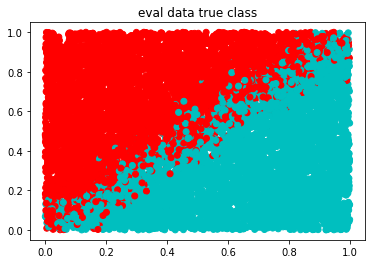

In [14]:
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_eval[:,0]])
plt.title('eval data true class')
plt.show()

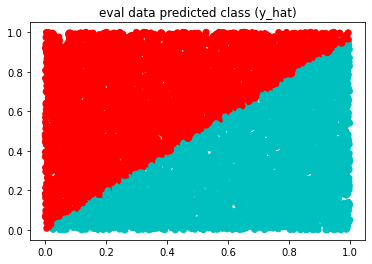

In [19]:
## Classifier 1 

# w = (X^T X)^(-1)X^T y
w_opt = np.linalg.inv(x_train.transpose()@x_train)@x_train.transpose()@y_train
y_hat = np.sign(x_eval@w_opt)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.title('eval data predicted class (y_hat)')
plt.show()


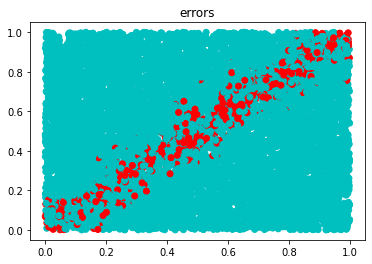

Errors: 759


In [20]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))

# 2b)

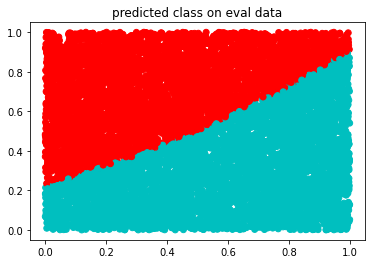

In [21]:
## Classifier 2
x_train_2 = np.hstack((x_train**6, x_train, np.ones((n_train,1)) ))
x_eval_2 = np.hstack((x_eval**6, x_eval, np.ones((n_eval,1)) ))
x_train_2 = np.hstack((x_train**6, x_train, np.ones((n_train,1)) ))
x_eval_2 = np.hstack((x_eval**6, x_eval, np.ones((n_eval,1)) ))

w_opt_2 = np.linalg.inv(x_train_2.transpose()@x_train_2)@x_train_2.transpose()@y_train
y_hat_2 = np.sign(x_eval_2@w_opt_2)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_2[:,0]])
plt.title('predicted class on eval data')
plt.show()

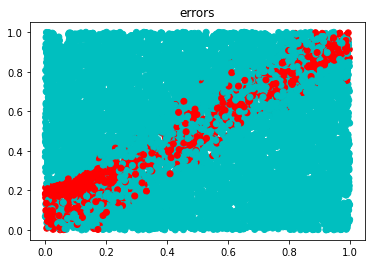

Error: 1066


In [22]:
error_vec_2 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_2, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec_2])
plt.title('errors')
plt.show()

print('Error: '+ str(sum(error_vec_2)))

# 2c)

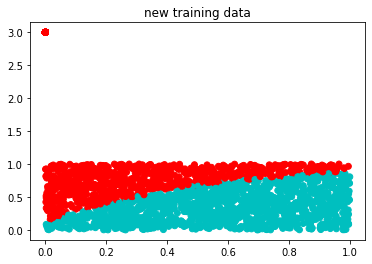

In [10]:
## create new, correctly labeled points 
n_new = 1000 #number of new datapoints
x_train_new = np.hstack((np.zeros((n_new,1)), 3*np.ones((n_new,1))))
y_train_new = np.ones((n_new,1))

## add these to the training data
x_train_outlier = np.vstack((x_train,x_train_new))
y_train_outlier = np.vstack((y_train,y_train_new))
plt.scatter(x_train_outlier[:,0],x_train_outlier[:,1], color=['c' if i==-1 else 'r' for i in y_train_outlier[:,0]])
plt.title('new training data')
plt.show()

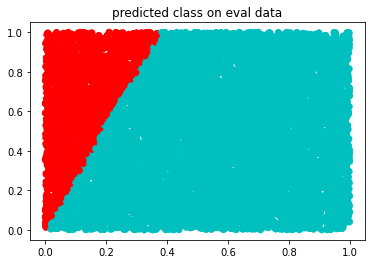

In [11]:
#train with new data
w_opt_outlier = np.linalg.inv(x_train_outlier.transpose()@x_train_outlier)@x_train_outlier.transpose()@y_train_outlier
y_hat_outlier = np.sign(x_eval@w_opt_outlier)

plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_outlier[:,0]])
plt.title('predicted class on eval data')
plt.show()

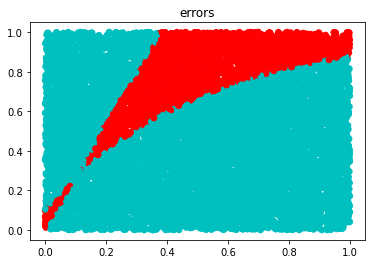

Errors: 2134


In [12]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_outlier, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))